# Natural Language Processing Lab

In this lab we will further explore Scikit's and NLTK's capabilities to process text. We will use the 20 Newsgroup dataset, which is provided by Scikit-Learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

## 1. Data inspection

We have downloaded a few newsgroup categories and removed headers, footers and quotes.

Let's inspect them.

1. What data taype is `data_train`
> sklearn.datasets.base.Bunch
- Is it like a list? Or like a Dictionary? or what?
> Dict
- How many data points does it contain?
- Inspect the first data point, what does it look like?
> A blurb of text

In [17]:
len(data_train.data)

2034

In [18]:
len(data_train.target)

2034

In [6]:
test_vect = CountVectorizer(stop_words=None)
X = test_vect.fit_transform([
       "I am a cat a freakin cat", 
       "I am a rat, a rat that cooks bacon and eats a lot of cheese.  Bacon is good for rats, everyone knows this.", 
       "I am a bat",
       "I am a rock",
       "I am a computer"
    ])
X.toarray()

array([[1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [30]:
df = pd.DataFrame(X.toarray(), columns=test_vect.vocabulary_)
df['obj_type'] = pd.Series(["animal", "animal", "animal", "inanimate", "inanimate"])

In [31]:
df

,and,cheese,everyone,rats,knows,that,am,is,bacon,cooks,...,bat,for,this,of,eats,cat,good,lot,rock,obj_type
0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,animal
1,1,1,2,0,0,1,0,1,1,1,...,1,1,1,1,2,1,0,1,1,animal
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,animal
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,inanimate
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,inanimate


In [9]:
# Setup data and add target to dataframe
df = pd.DataFrame(data_train.data)
df['newsgroup'] = data_train.target
df['newsgroup'] = df['newsgroup'].map(lambda index: data_train.target_names[index])
df.columns = ["text", "newsgroup"]

In [10]:
df.head()

,text,newsgroup
0,"Hi,\n\nI've noticed that if you only save a mo...",comp.graphics
1,"\n\nSeems to be, barring evidence to the contr...",talk.religion.misc
2,\n >In article <1993Apr19.020359.26996@sq.sq.c...,sci.space
3,I have a request for those who would like to s...,alt.atheism
4,AW&ST had a brief blurb on a Manned Lunar Exp...,sci.space


In [11]:
vect = CountVectorizer()
vect.fit(df['text'])
X_train = vect.transform(df['text']).toarray()

In [12]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
data_train.target_names



['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [14]:
df

,text,newsgroup
0,"Hi,\n\nI've noticed that if you only save a mo...",comp.graphics
1,"\n\nSeems to be, barring evidence to the contr...",talk.religion.misc
2,\n >In article <1993Apr19.020359.26996@sq.sq.c...,sci.space
3,I have a request for those who would like to s...,alt.atheism
4,AW&ST had a brief blurb on a Manned Lunar Exp...,sci.space
5,\nThere are definitely quite a few horrible de...,alt.atheism
6,Mark Prado\n \n \nOld pioneer song from the ...,sci.space
7,\nAcorn Replay running on a 25MHz ARM 3 proces...,comp.graphics
8,\nTheir Hiten engineering-test mission spent a...,sci.space
9,I'm interested in find out what is involved in...,comp.graphics


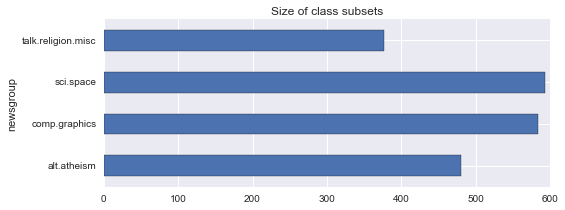

In [15]:
df.groupby("newsgroup").size().plot(kind="barh", title="Size of class subsets", figsize=(8, 3))


## 2. Bag of Words model

Let's train a model using a simple count vectorizer

1. Initialize a standard CountVectorizer and fit the training data
- how big is the feature dictionary
- repeat eliminating english stop words
- is the dictionary smaller?
- transform the training data using the trained vectorizer
- what are the 20 words that are most common in the whole corpus?
- what are the 20 most common words in each of the 4 classes?
- evaluate the performance of a Lotistic Regression on the features extracted by the CountVectorizer
    - you will have to transform the test_set too. Be carefule to use the trained vectorizer, without re-fitting it
- try the following 3 modification:
    - restrict the max_features
    - change max_df and min_df
    - use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier
- for each of the above print a confusion matrix and investigate what gets mixed
> Anwer: not surprisingly if we reduce the feature space we lose accuracy
- print out the number of features for each model

In [16]:
## To extend the default stopwords list cast the wordlist to a new list and append new list items to it
from sklearn.feature_extraction import stop_words
my_stop_words = list(stop_words.ENGLISH_STOP_WORDS)

my_stop_words += "forshizzle"
my_stop_words += "onamonapia"

# From here, you can pass this new stopwords list to a vectorizer

## 3. Hashing and TF-IDF

Let's see if Hashing or TF-IDF improves the accuracy.

1. Initialize a HashingVectorizer and repeat the test with no restriction on the number of features
- does the score improve with respect to the count vectorizer?
    - can you change any of the default parameters to improve it?
- print out the number of features for this model
- Initialize a TF-IDF Vectorizer and repeat the analysis above
- can you improve on your best score above?
    - can you change any of the default parameters to improve it?
- print out the number of features for this model

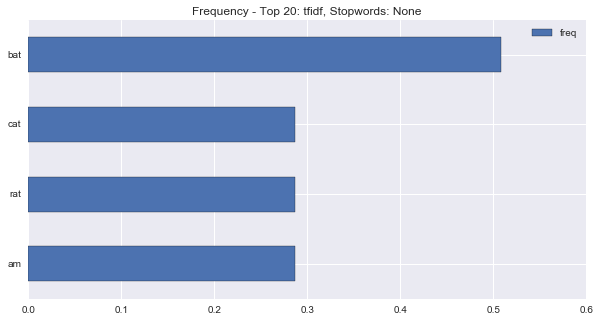

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def plot_freq(data, vectorizer="tfidf", stopwords=None):
    
    if vectorizer == "tfidf":
        vect = TfidfVectorizer(stop_words=stopwords, sublinear_tf=False, use_idf=True, smooth_idf=True, )
    else:
        vect = CountVectorizer(stop_words=stopwords)
    
    X      =  vect.fit_transform(data)
    x_df   =  pd.DataFrame(X.toarray(), columns=vect.vocabulary_)
    tf_df  =  pd.DataFrame(x_df.mean(), columns=["freq"])
    
    title  =  "Frequency - Top 20: %s, Stopwords: %s" % (vectorizer, stopwords)
    
    tf_df.sort_values("freq").tail(20).plot(kind="barh", title=title, figsize=(10,5))
    
plot_freq(["I am a cat", "I am a bat", "I am a rat"], vectorizer="tfidf")

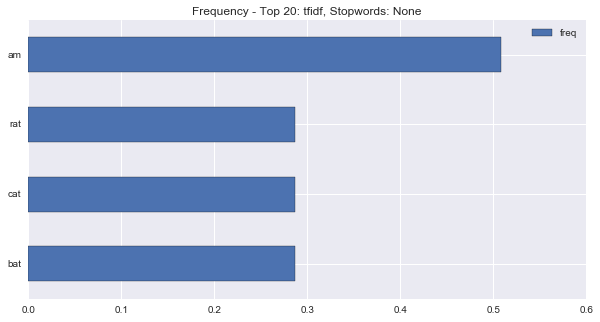

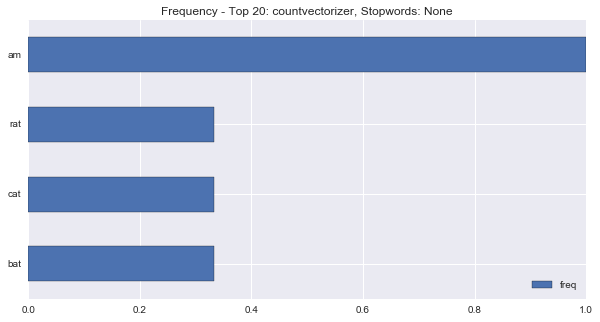

In [18]:
plot_freq(["I am a cat", "I am a bat", "I am a rat"], vectorizer="tfidf")
# plot_freq(["I am a cat", "I am a bat", "I am a rat"], vectorizer="countvectorizer")

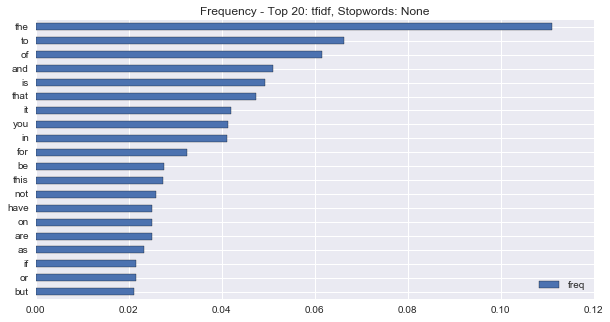

In [32]:
plot_freq(df['text'], vectorizer="tfidf")

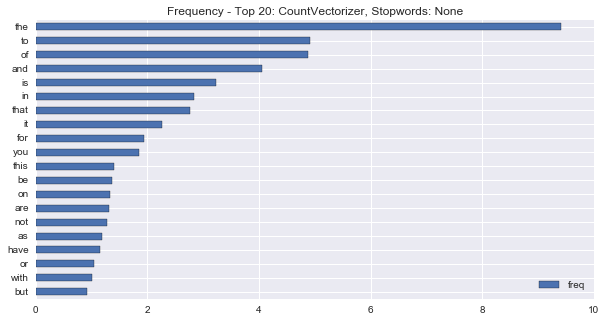

In [33]:
plot_freq(df['text'], vectorizer="CountVectorizer")

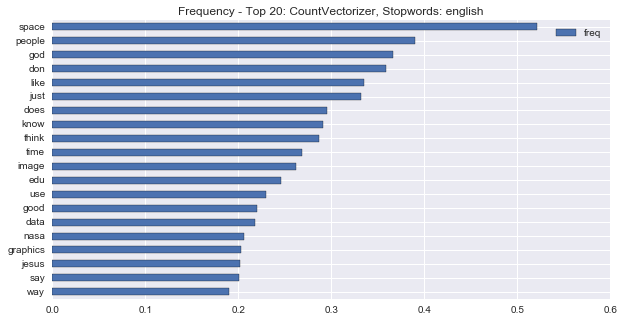

In [34]:
plot_freq(df['text'], vectorizer="CountVectorizer", stopwords="english")

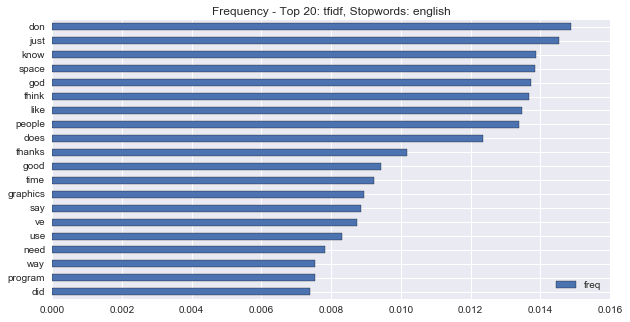

In [35]:
plot_freq(df['text'], vectorizer="tfidf", stopwords="english")

## 4. Classifier comparison

Of all the vectorizers tested above, choose one that has a reasonable performance with a manageable number of features and compare the performance of these models:

- KNN
- Logistic Regression
- Decision Trees
- Support Vector Machine
- Random Forest
- Extra Trees

In order to speed up the calculation it's better to vectorize the data only once and then compare the models.

In [25]:
data_total = data_train.data + data_test.data


In [29]:
from sklearn.linear_model import LogisticRegression

data_all = pd.DataFrame(data_train.data + data_test.data, columns=["text"])

# Intialize vectorizer
cvec = CountVectorizer(stop_words='english')
cvec.fit(data_all['text'])

# Setup train / test data
X_train  = pd.DataFrame(cvec.transform(data_train.data).todense(),
                   columns=cvec.vocabulary_)

y_train = data_train.target

## Test data below
X_test  = pd.DataFrame(cvec.transform(data_test.data).todense(),
                   columns=cvec.vocabulary_)

y_test  = data_test.target

# setup model / logistic regressio
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.74501108647450109

In [ ]:
from sklearn.datasets import load

## Bonus: Other classifiers

Adapt the code from [this example](http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#example-text-document-classification-20newsgroups-py) to compare across all the classifiers suggested and to display the final plot

## Bonus: NLTK

NLTK is a vast library. Can you find some interesting bits to share with classmates?
Start here: http://www.nltk.org/